In [1]:
import sys
import os

# Get current working directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

#Insert the path to the parent directory
sys.path.insert(0, parent_dir)

c:\Users\Yayerad\Telecom\notebooks
c:\Users\Yayerad\Telecom


In [2]:
# Import the custom loader script
from scripts.db_loader import load_data

In [3]:
# Load data from the database into a DataFrame
df = load_data()

# Check if data is loaded
if df is not None:
    print("Data loaded successfully.")
    print(df.head())  # Display the first few rows of the data

Data loaded successfully.
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          2024739

In [5]:
pip install matplotlib seaborn

^C
Note: you may need to restart the kernel to use updated packages.


          Bearer Id                          Start       Start ms  \
count  1.490100e+05                         150000  150000.000000   
mean   1.013887e+19  2019-04-26 12:36:09.616800256     499.188200   
min    6.917538e+18            2019-04-04 12:01:00       0.000000   
25%    7.349883e+18            2019-04-25 00:26:00     250.000000   
50%    7.349883e+18            2019-04-26 08:51:00     499.000000   
75%    1.304243e+19            2019-04-27 18:18:15     749.000000   
max    1.318654e+19            2019-04-29 07:28:00     999.000000   
std    2.893173e+18                            NaN     288.611834   

                                 End         End ms     Dur. (ms)  \
count                         150000  150000.000000  1.500000e+05   
mean   2019-04-27 17:39:38.703200256     498.800880  1.046086e+05   
min              2019-04-24 22:59:00       0.000000  7.142000e+03   
25%              2019-04-26 07:30:00     251.000000  5.744050e+04   
50%              2019-04-27 23:02

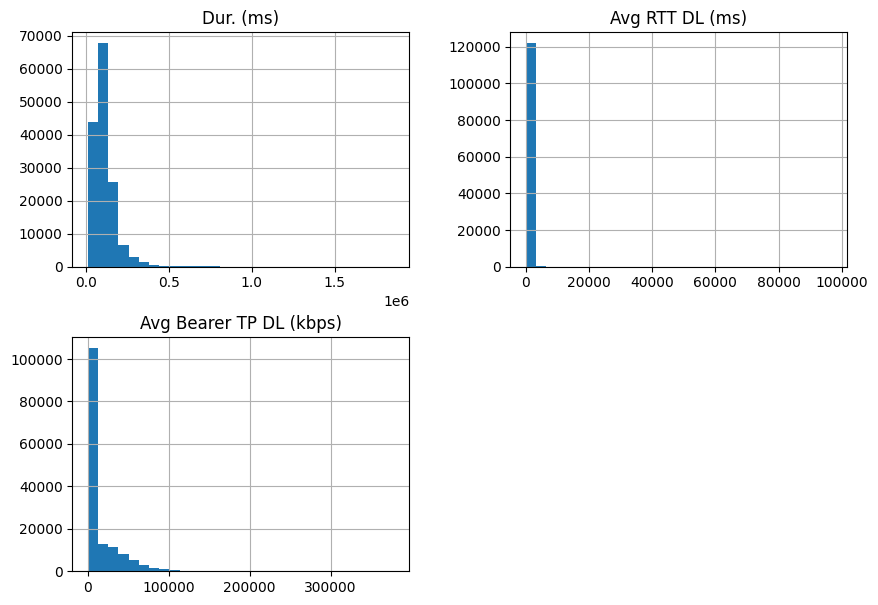

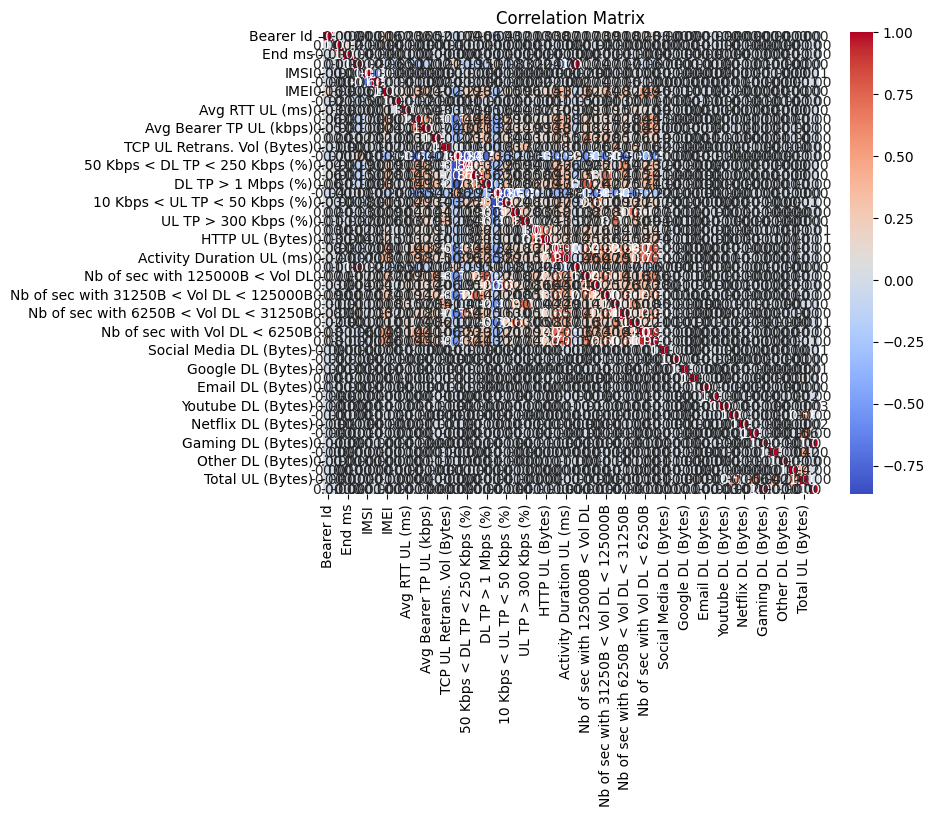

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Histograms for numeric columns
df[['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)']].hist(bins=30, figsize=(10, 7))
plt.show()

# Convert date strings to datetime objects (if there are any date columns)
df['Start'] = pd.to_datetime(df['Start'], errors='coerce')
df['End'] = pd.to_datetime(df['End'], errors='coerce')

# Convert other relevant columns to numeric (if needed)
df['Dur. (ms)'] = pd.to_numeric(df['Dur. (ms)'], errors='coerce')
df['Avg RTT DL (ms)'] = pd.to_numeric(df['Avg RTT DL (ms)'], errors='coerce')
df['Avg Bearer TP DL (kbps)'] = pd.to_numeric(df['Avg Bearer TP DL (kbps)'], errors='coerce')

## Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()